# Validation of Junior Results
1. Do the conditions have the right genome sizes?
2. Are the comm sensors disabled in no_comm conditions (3 & 4)?
3. Are the cs connections disabled in no comm_self conditions (2 & 4)?
4. Are selection happening correctly (the individuals with the highest fitness scores are selected)?
5. Do the fitness scores look right? (average from 10 trials should be reasonably close to the recorded fitness)


In [1]:
import pandas as pd
import pickle

In [82]:
# condition 1
cond1gen0 = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_conn_Run0_Gen0.dat')
cond1gen1 = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_conn_Run0_Gen1.dat')
cond1final = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_conn_Run0_final.genome')
cond1exp = pickle.load(open('./JRData/JRExpTest/JRExp_comm_cs_conn_Run0.exp', 'rb'))

# condition 2
cond2gen0 = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_disconn_Run0_Gen0.dat')
cond2gen1 = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_disconn_Run0_Gen1.dat')
cond2final = pd.read_csv('./JRData/JRExpTest/JRExp_comm_cs_disconn_Run0_final.genome')
cond2exp = pickle.load(open('./JRData/JRExpTest/JRExp_comm_cs_disconn_Run0.exp', 'rb'))

# condition 3
cond3gen0 = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_conn_Run0_Gen0.dat')
cond3gen1 = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_conn_Run0_Gen1.dat')
cond3final = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_conn_Run0_final.genome')
cond3exp = pickle.load(open('./JRData/JRExpTest/JRExp_no_comm_cs_conn_Run0.exp', 'rb'))

# condition 4
cond4gen0 = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_disconn_Run0_Gen0.dat')
cond4gen1 = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_disconn_Run0_Gen1.dat')
cond4final = pd.read_csv('./JRData/JRExpTest/JRExp_no_comm_cs_disconn_Run0_final.genome')
cond4exp = pickle.load(open('./JRData/JRExpTest/JRExp_no_comm_cs_disconn_Run0.exp', 'rb'))

# 1. Do the conditions have the right genome sizes?

Yep

In [4]:
def get_loci(df):
    loci = [c for c in df.columns if 'locus' in c]
    return loci

In [83]:
# condition 1
print(len(get_loci(cond1gen0)) == 69)
print(len(get_loci(cond1gen1)) == 69)
print(len(get_loci(cond1final)) == 69)
print(len(cond1gen1.columns))

# condition 2
print(len(get_loci(cond2gen0)) == 65)
print(len(get_loci(cond2gen1)) == 65)
print(len(get_loci(cond2final)) == 65)
print(len(cond2gen1.columns))

# condition 3
print(len(get_loci(cond3gen0)) == 69)
print(len(get_loci(cond3gen1)) == 69)
print(len(get_loci(cond3final)) == 69)
print(len(cond3gen1.columns))

# condition 4
print(len(get_loci(cond4gen0)) == 65)
print(len(get_loci(cond4gen1)) == 65)
print(len(get_loci(cond4final)) == 65)
print(len(cond4gen1.columns))


True
True
True
91
True
True
True
87
True
True
True
91
True
True
True
87


# 2. Are the comm sensors disabled in no_comm conditions (3 & 4)?

Yep

In [6]:
# Should be False for cond 1 & 2, and True for cond 3 & 4
print(cond1exp.trial.comm_disabled,
      cond2exp.trial.comm_disabled,
      cond3exp.trial.comm_disabled,
      cond4exp.trial.comm_disabled)

False False True True


# 3. Are the cs connections disabled in no comm_self conditions (2 & 4)?

No for now. Gotta fix it.

In [7]:
from Helper import normalize

[2.1764705882352944, -2.6862745098039214, 1.8235294117647065, -0.7254901960784315, -3.392156862745098, -4.0588235294117645, 3.5098039215686274, 3.0784313725490193, -3.7450980392156863, 2.3725490196078436, -1.2352941176470589, -2.372549019607843, 1.0784313725490193, -4.098039215686274, -2.8823529411764706, 1.3921568627450975, 2.2941176470588234, 3.8235294117647065, 4.137254901960784, -3.0784313725490193, -2.5686274509803924, 1.3921568627450975, 1.3137254901960782, 2.2941176470588234, -3.588235294117647, 1.6274509803921564, 2.2941176470588234, -4.764705882352941, -0.8431372549019605, 2.803921568627451, -1.0784313725490198, -4.8431372549019605, 4.882352941176471, 4.372549019607844, 1.9803921568627452, -0.9607843137254903, -2.215686274509804, -2.411764705882353, 1.666666666666666, 3.1960784313725483, -2.450980392156863, 2.4117647058823533, 2.9607843137254894, 3.235294117647058, 3.2745098039215677, 3.7058823529411775, 4.372549019607844, 0.17647058823529438, 3.4705882352941178, -1.5098039215

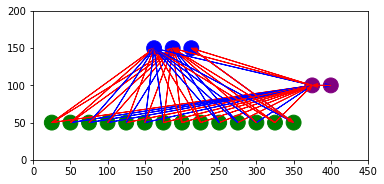

In [8]:
print([normalize(g) for g in cond1exp.trial.ann.genome])
print(len(cond1exp.trial.ann.genome))
cond1exp.trial.ann.show()
print(cond3exp.trial.ann.comm_self_connected)  # should be False

[2.1764705882352944, -2.6862745098039214, 1.8235294117647065, -0.7254901960784315, -3.392156862745098, -4.0588235294117645, 3.5098039215686274, 3.0784313725490193, -3.7450980392156863, 2.3725490196078436, -1.2352941176470589, -2.372549019607843, 1.0784313725490193, -4.098039215686274, -2.8823529411764706, 1.3921568627450975, 2.2941176470588234, 3.8235294117647065, 4.137254901960784, -3.0784313725490193, -2.5686274509803924, 1.3921568627450975, 1.3137254901960782, 2.2941176470588234, -3.588235294117647, 1.6274509803921564, 2.2941176470588234, -4.764705882352941, -0.8431372549019605, 2.803921568627451, -1.0784313725490198, -4.8431372549019605, 4.882352941176471, 4.372549019607844, 1.9803921568627452, -0.9607843137254903, -2.215686274509804, -2.411764705882353, 1.666666666666666, 3.1960784313725483, -2.450980392156863, 2.4117647058823533, 2.9607843137254894, 3.235294117647058, 3.2745098039215677, 3.7058823529411775, 4.372549019607844, 0.17647058823529438, 3.4705882352941178, -1.5098039215

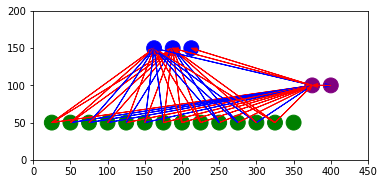

In [9]:
print([normalize(g) for g in cond2exp.trial.ann.genome])
print(len(cond2exp.trial.ann.genome))  # should be 65
cond2exp.trial.ann.show()
print(cond2exp.trial.ann.comm_self_connected)  # should be False

[2.1764705882352944, -2.6862745098039214, 1.8235294117647065, -0.7254901960784315, -3.392156862745098, -4.0588235294117645, 3.5098039215686274, 3.0784313725490193, -3.7450980392156863, 2.3725490196078436, -1.2352941176470589, -2.372549019607843, 1.0784313725490193, -4.098039215686274, -2.8823529411764706, 1.3921568627450975, 2.2941176470588234, 3.8235294117647065, 4.137254901960784, -3.0784313725490193, -2.5686274509803924, 1.3921568627450975, 1.3137254901960782, 2.2941176470588234, -3.588235294117647, 1.6274509803921564, 2.2941176470588234, -4.764705882352941, -0.8431372549019605, 2.803921568627451, -1.0784313725490198, -4.8431372549019605, 4.882352941176471, 4.372549019607844, 1.9803921568627452, -0.9607843137254903, -2.215686274509804, -2.411764705882353, 1.666666666666666, 3.1960784313725483, -2.450980392156863, 2.4117647058823533, 2.9607843137254894, 3.235294117647058, 3.2745098039215677, 3.7058823529411775, 4.372549019607844, 0.17647058823529438, 3.4705882352941178, -1.5098039215

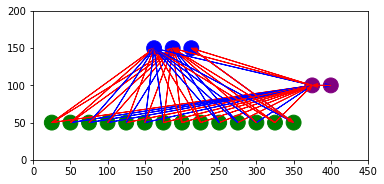

In [10]:
print([normalize(g) for g in cond3exp.trial.ann.genome])
print(len(cond3exp.trial.ann.genome))
cond3exp.trial.ann.show()
print(cond3exp.trial.ann.comm_self_connected)  # should be true

[2.1764705882352944, -2.6862745098039214, 1.8235294117647065, -0.7254901960784315, -3.392156862745098, -4.0588235294117645, 3.5098039215686274, 3.0784313725490193, -3.7450980392156863, 2.3725490196078436, -1.2352941176470589, -2.372549019607843, 1.0784313725490193, -4.098039215686274, -2.8823529411764706, 1.3921568627450975, 2.2941176470588234, 3.8235294117647065, 4.137254901960784, -3.0784313725490193, -2.5686274509803924, 1.3921568627450975, 1.3137254901960782, 2.2941176470588234, -3.588235294117647, 1.6274509803921564, 2.2941176470588234, -4.764705882352941, -0.8431372549019605, 2.803921568627451, -1.0784313725490198, -4.8431372549019605, 4.882352941176471, 4.372549019607844, 1.9803921568627452, -0.9607843137254903, -2.215686274509804, -2.411764705882353, 1.666666666666666, 3.1960784313725483, -2.450980392156863, 2.4117647058823533, 2.9607843137254894, 3.235294117647058, 3.2745098039215677, 3.7058823529411775, 4.372549019607844, 0.17647058823529438, 3.4705882352941178, -1.5098039215

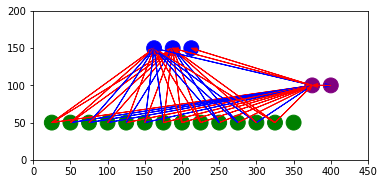

In [11]:
print([normalize(g) for g in cond4exp.trial.ann.genome])
print(len(cond4exp.trial.ann.genome))
cond4exp.trial.ann.show()
print(cond4exp.trial.ann.comm_self_connected)  # should be false

# 4. Are selection happening correctly (the individuals with the highest fitness scores are selected)?


### Condition 1: ok

In [12]:
cond1gen0.sort_values(by='total_fit', 
                      ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
29,29,40,113,136,242,194.3750
1,1,95,42,38,188,156.3250
57,57,128,111,95,9,150.7500
79,79,158,91,51,206,142.9500
30,30,27,157,77,70,141.4875
48,48,57,113,106,54,137.6500
74,74,185,235,170,135,122.0250
63,63,214,186,38,203,121.0875
81,81,56,49,189,241,119.8125
21,21,80,190,99,177,119.0500


In [13]:
cond1gen1[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
0,0,40,113,136,242,147.6125
1,1,40,113,136,242,102.1375
2,2,40,113,136,242,164.6000
3,3,40,54,136,242,150.6875
4,4,40,113,136,242,142.5750
5,5,95,42,38,188,154.8625
6,6,95,42,38,188,117.7500
7,7,95,42,38,188,178.1750
8,8,95,42,38,188,137.4750
9,9,95,42,38,188,150.5000


In [51]:
cond1gen1.sort_values(by='total_fit', 
                 ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
12,12,128,111,95,9,195.6375
60,60,6,57,182,91,194.3750
61,61,6,57,182,91,194.3000
13,13,128,111,95,9,192.2125
14,14,128,111,95,9,186.3625
43,43,56,49,189,241,185.7875
7,7,95,42,38,188,178.1750
11,11,128,111,95,9,172.4375
2,2,40,113,136,242,164.6000
44,44,56,49,189,235,155.0750


In [61]:
cond1gen1[cond1gen1['pop']==25][[c for c in cond1gen1.columns if 'trial' in c]]

,trial_0_fit,trial_1_fit,trial_2_fit,trial_3_fit,trial_4_fit,trial_5_fit,trial_6_fit,trial_7_fit,trial_8_fit,trial_9_fit,trial_10_fit,trial_11_fit,trial_12_fit,trial_13_fit,trial_14_fit,trial_15_fit,trial_16_fit,trial_17_fit,trial_18_fit,trial_19_fit
25,0.0,256.5,0.0,-1084.0,229.75,0.0,10.5,0.0,23.5,-1135.5,0.0,0.0,0.0,138.25,-412.5,0.0,0.0,245.0,0.0,220.25


In [128]:
cond1final[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3']]

,pop,locus_0,locus_1,locus_2,locus_3
0,0,56,49,189,241
1,1,56,49,189,241
2,2,56,49,189,241
3,3,56,49,189,241
4,4,56,49,189,241
5,5,6,57,182,91
6,6,6,57,182,91
7,7,6,57,182,91
8,8,6,57,182,91
9,9,6,57,182,91


### Condition 2 OK

In [14]:
cond2gen0.sort_values(by='total_fit', 
                      ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
57,57,128,111,95,9,217.0375
20,20,40,56,223,12,144.7625
1,1,95,42,38,188,119.4750
87,87,171,31,78,88,119.3750
79,79,158,91,51,206,113.5875
48,48,57,113,106,54,112.1875
82,82,215,182,23,75,100.9500
24,24,139,233,125,113,98.4125
28,28,188,127,108,163,95.5750
91,91,116,179,79,170,92.0500


In [15]:
cond2gen1[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
0,0,128,111,95,9,271.1750
1,1,128,111,95,9,243.2125
2,2,128,111,95,9,250.2000
3,3,128,111,95,9,212.1250
4,4,128,111,95,9,260.2500
5,5,40,56,223,12,122.4375
6,6,40,56,223,12,113.4000
7,7,40,56,223,12,69.5125
8,8,40,56,223,12,115.4375
9,9,40,56,223,12,121.8500


In [55]:
cond2gen1.sort_values(by='total_fit', 
                 ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
0,0,128,111,95,9,271.1750
4,4,128,111,95,9,260.2500
2,2,128,111,95,9,250.2000
1,1,128,111,95,9,243.2125
3,3,128,111,95,9,212.1250
18,18,171,31,78,88,197.7750
15,15,171,31,78,88,163.9625
16,16,171,31,78,88,144.6625
60,60,27,157,77,70,136.5750
19,19,171,31,78,88,135.8750


In [18]:
cond2final[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3']]

,pop,locus_0,locus_1,locus_2,locus_3
0,0,128,111,95,9
1,1,128,111,95,9
2,2,128,111,95,9
3,3,128,111,95,9
4,4,128,111,95,9
5,5,128,111,95,9
6,6,128,111,95,9
7,7,128,111,95,9
8,8,128,111,251,9
9,9,128,111,95,9


### Condition 3 ok

In [19]:
cond3gen0.sort_values(by='total_fit', 
                      ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
81,81,56,49,189,241,231.1875
9,9,6,57,182,91,211.2375
21,21,80,190,99,177,183.1250
57,57,128,111,95,9,160.5125
29,29,40,113,136,242,142.8625
24,24,139,233,125,113,120.5375
64,64,187,14,64,0,118.9375
1,1,95,42,38,188,104.1875
87,87,171,31,78,88,91.9500
58,58,139,140,43,190,91.6125


In [20]:
cond3gen1[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
0,0,225,49,189,241,145.7750
1,1,56,49,189,241,235.1875
2,2,56,49,189,241,180.3000
3,3,56,49,189,241,235.3125
4,4,56,49,189,241,230.9125
5,5,6,57,182,91,15.4250
6,6,6,57,182,91,218.1000
7,7,6,57,182,91,251.2125
8,8,6,57,182,91,178.2625
9,9,6,57,182,91,190.1125


In [56]:
cond3gen1.sort_values(by='total_fit', 
                 ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
19,19,128,111,95,9,412.1125
15,15,128,111,95,9,286.9250
11,11,80,190,99,177,270.8625
7,7,6,57,182,91,251.2125
18,18,128,111,95,9,244.9000
3,3,56,49,189,241,235.3125
1,1,56,49,189,241,235.1875
10,10,80,190,99,177,234.4125
16,16,128,111,95,9,234.1875
24,24,40,113,136,242,233.4125


In [22]:
cond3final[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3']]

,pop,locus_0,locus_1,locus_2,locus_3
0,0,128,111,95,9
1,1,128,111,95,9
2,2,128,111,95,9
3,3,128,111,95,9
4,4,128,111,95,9
5,5,128,111,95,9
6,6,128,111,95,9
7,7,128,111,95,9
8,8,128,111,95,9
9,9,128,111,192,9


### Condition 4

In [23]:
cond4gen0.sort_values(by='total_fit', 
                      ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
20,20,40,56,223,12,147.1500
74,74,185,235,170,135,145.0625
30,30,27,157,77,70,144.3000
61,61,175,224,131,27,126.2875
52,52,243,0,118,150,118.5875
57,57,128,111,95,9,110.4250
24,24,139,233,125,113,90.3000
87,87,171,31,78,88,78.4125
58,58,139,140,43,190,69.8625
60,60,94,234,26,217,67.3875


In [24]:
cond4gen1[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
0,0,40,56,223,12,121.9125
1,1,40,56,223,12,139.9125
2,2,40,56,223,12,130.6750
3,3,40,56,223,81,134.1125
4,4,40,56,223,12,66.2125
5,5,185,235,170,135,147.3125
6,6,185,235,170,135,139.0250
7,7,185,235,170,135,137.6125
8,8,185,235,170,135,189.3625
9,9,185,235,170,135,174.0375


In [57]:
cond4gen1.sort_values(by='total_fit', 
                 ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'total_fit']]

,pop,locus_0,locus_1,locus_2,locus_3,total_fit
8,8,185,235,170,135,189.3625
19,19,175,224,131,27,183.1875
39,39,171,31,78,88,180.0250
14,14,27,157,143,70,174.4000
9,9,185,235,170,135,174.0375
28,28,128,111,95,9,169.7625
56,56,40,113,136,242,169.5500
38,38,171,31,78,88,163.7375
59,59,40,113,136,242,158.0000
5,5,185,235,170,135,147.3125


In [ ]:
cond4final[['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3']]

# 5. Do the fitness scores look right? (average from 10 trials should be reasonably close to the recorded fitness)

In [29]:
from Controller import MN_controller
from Trial import trial

def get_genome(gen_df, pop):
    loci = [c for c in gen_df.columns if 'locus' in c]
    p = gen_df[gen_df['pop']==pop][loci].values.tolist()[0]
    return p

def test_fitness(gen_df, pop, cond):
    g = get_genome(gen_df, pop)
    print(len(g))
    print(g)
    if cond == 1:
        ann = MN_controller(g, comm_self_connected=True)
        t = trial(ann, comm_disabled=False)
    elif cond == 2:
        ann = MN_controller(g, comm_self_connected=False)
        t = trial(ann, comm_disabled=False)
    elif cond == 3:
        ann = MN_controller(g, comm_self_connected=True)
        t = trial(ann, comm_disabled=True)
    elif cond == 4:
        ann = MN_controller(g, comm_self_connected=False)
        t = trial(ann, comm_disabled=True)
    
    total = []
    for i in range(10):
        t.run()
        total.append(t.fitness)
    
    print(sum(total)/10)
    print(total)
    return total

def lookup_fit(gen_df, pop):
    p = gen_df[gen_df['pop']==pop]['total_fit'].values.tolist()[0]
    print(p)
    return p

### Condition 1

In [52]:
test_fitness(cond1gen1, 12, 1)
lookup_fit(cond1gen1, 12)

69
[128, 111, 95, 9, 127, 32, 252, 22, 141, 183, 210, 69, 195, 215, 138, 244, 111, 3, 122, 223, 182, 226, 134, 86, 171, 224, 30, 119, 143, 194, 167, 65, 45, 210, 179, 53, 28, 104, 62, 201, 113, 217, 25, 172, 196, 166, 192, 148, 208, 18, 161, 110, 207, 36, 142, 160, 104, 79, 24, 159, 189, 172, 36, 101, 202, 76, 76, 215, 131]
170.25
[9.0, 39.25, 746.0, 153.75, 0.0, 419.25, 0.0, 17.25, 303.0, 15.0]
195.6375


195.6375

In [63]:
test_fitness(cond1gen1, 25, 1)
lookup_fit(cond1gen1, 25)

69
[57, 113, 106, 54, 189, 69, 38, 104, 171, 218, 105, 116, 200, 191, 13, 42, 159, 79, 55, 155, 87, 42, 205, 128, 137, 211, 222, 132, 206, 15, 180, 20, 9, 100, 207, 53, 236, 65, 124, 203, 239, 25, 239, 255, 99, 176, 114, 144, 224, 25, 131, 172, 201, 106, 225, 240, 188, 159, 85, 89, 118, 133, 129, 138, 141, 42, 212, 114, 122]
-66.0
[0.0, 0.0, 15.5, 0.0, 0.0, 278.5, 0.0, 223.0, -1177.0, 0.0]
-75.4125


-75.4125

In [54]:
test_fitness(cond1gen1, 53, 1)
lookup_fit(cond1gen1, 53)

69
[139, 233, 125, 113, 115, 83, 170, 31, 28, 165, 8, 147, 95, 93, 148, 52, 135, 14, 221, 239, 46, 118, 188, 20, 132, 129, 42, 190, 81, 157, 32, 216, 55, 164, 122, 91, 44, 231, 219, 136, 136, 57, 78, 172, 47, 44, 216, 27, 185, 48, 114, 221, 195, 40, 113, 131, 173, 87, 222, 140, 113, 57, 168, 204, 119, 62, 223, 4, 162]
108.85
[48.25, 99.75, 76.25, 108.25, 140.75, 121.25, 169.0, 114.5, 130.25, 80.25]
113.2375


113.2375

### Condition 2

In [64]:
# best
test_fitness(cond2gen1, 0, 2)
lookup_fit(cond2gen1, 0)

65
[128, 111, 95, 9, 127, 32, 252, 64, 141, 183, 210, 69, 195, 215, 64, 244, 111, 3, 122, 223, 182, 226, 134, 86, 171, 224, 30, 119, 143, 194, 167, 65, 45, 210, 179, 53, 28, 104, 62, 201, 113, 217, 25, 172, 196, 166, 97, 159, 208, 18, 161, 110, 207, 36, 142, 160, 104, 47, 24, 159, 101, 202, 119, 76, 215]
303.575
[232.75, 380.5, 445.0, 244.0, 473.0, 309.5, 230.5, 161.0, 315.0, 244.5]
271.175


271.175

In [65]:
# worst
test_fitness(cond2gen1, 57, 2)
lookup_fit(cond2gen1, 57)

65
[32, 25, 79, 84, 38, 125, 42, 141, 60, 194, 83, 207, 40, 146, 124, 211, 189, 218, 139, 138, 150, 165, 162, 139, 173, 2, 37, 235, 193, 176, 228, 4, 216, 160, 100, 39, 107, 126, 188, 73, 161, 175, 251, 172, 2, 201, 208, 218, 100, 11, 126, 71, 223, 79, 227, 232, 32, 37, 111, 240, 7, 76, 204, 230, 202]
-94.8
[0.0, 0.0, 34.5, 0.0, 0.0, 0.0, 0.0, -300.25, 24.0, -706.25]
-32.4


-32.4

In [66]:
# 53
test_fitness(cond2gen1, 53, 2)
lookup_fit(cond2gen1, 53)

65
[185, 235, 170, 135, 130, 132, 127, 195, 80, 189, 16, 21, 135, 164, 6, 121, 98, 93, 167, 232, 235, 93, 168, 70, 219, 175, 86, 198, 64, 126, 157, 141, 210, 61, 54, 70, 19, 49, 161, 141, 157, 55, 247, 28, 2, 217, 70, 241, 212, 148, 136, 227, 228, 3, 23, 31, 248, 95, 77, 125, 231, 157, 7, 178, 6]
106.55
[46.75, 170.0, 74.0, 22.5, 135.25, 142.0, 146.0, 66.25, 212.25, 50.5]
99.0


99.0

### Condition 3

In [71]:
# best
test_fitness(cond3gen1, 19, 3)
lookup_fit(cond3gen1, 19)

69
[128, 111, 95, 9, 127, 32, 252, 64, 141, 183, 210, 69, 195, 215, 64, 244, 111, 229, 122, 223, 182, 226, 134, 86, 171, 224, 30, 119, 143, 194, 167, 65, 45, 210, 179, 53, 28, 104, 62, 201, 69, 217, 25, 172, 196, 166, 97, 159, 208, 18, 161, 110, 207, 36, 142, 160, 104, 79, 24, 159, 189, 172, 36, 101, 202, 76, 76, 215, 131]
315.35
[181.25, 273.25, 248.75, 347.0, 365.5, 307.0, 418.5, 268.25, 254.5, 489.5]
412.1125


412.1125

In [72]:
# worst
test_fitness(cond3gen1, 44, 3)
lookup_fit(cond3gen1, 44)

69
[171, 31, 78, 88, 153, 122, 145, 221, 79, 126, 164, 152, 60, 55, 47, 5, 183, 35, 16, 81, 20, 122, 252, 239, 142, 153, 147, 79, 103, 101, 245, 221, 102, 153, 133, 189, 33, 220, 231, 167, 158, 35, 50, 81, 187, 207, 237, 228, 128, 197, 166, 150, 36, 9, 185, 177, 230, 40, 132, 12, 25, 92, 79, 66, 237, 124, 42, 155, 140]
22.025
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 220.25, 0.0, 0.0, 0.0]
9.1875


9.1875

In [73]:
# 53
test_fitness(cond3gen1, 53, 3)
lookup_fit(cond3gen1, 53)

69
[27, 157, 77, 70, 62, 228, 27, 251, 152, 117, 76, 113, 31, 238, 113, 225, 134, 36, 111, 144, 49, 204, 131, 20, 211, 183, 228, 43, 182, 155, 47, 122, 165, 138, 140, 130, 250, 161, 196, 210, 214, 125, 223, 255, 151, 199, 121, 249, 188, 205, 153, 64, 167, 58, 233, 200, 247, 40, 93, 245, 203, 216, 175, 18, 190, 207, 183, 253, 202]
158.35
[0.0, 0.0, 223.5, 336.25, 162.0, 122.5, 0.0, 135.0, 378.5, 225.75]
117.45


117.45

### Condition 4

In [68]:
# best
test_fitness(cond4gen1, 8, 4)
lookup_fit(cond4gen1, 8)

65
[185, 235, 170, 135, 130, 132, 127, 195, 80, 189, 16, 21, 135, 164, 6, 121, 98, 93, 167, 232, 235, 93, 168, 89, 219, 175, 86, 198, 64, 126, 157, 141, 210, 61, 54, 70, 19, 49, 161, 141, 157, 55, 247, 28, 2, 217, 70, 241, 212, 148, 136, 227, 228, 3, 23, 31, 248, 95, 77, 125, 231, 157, 7, 178, 6]
105.975
[144.25, 58.75, 0.0, 74.5, 166.75, 65.5, 141.0, 141.5, 261.25, 6.25]
189.3625


189.3625

In [69]:
# worst
test_fitness(cond4gen1, 79, 4)
lookup_fit(cond4gen1, 79)

65
[188, 127, 108, 163, 67, 82, 138, 242, 185, 4, 220, 217, 252, 126, 192, 27, 188, 82, 48, 131, 247, 191, 210, 183, 13, 59, 156, 59, 99, 106, 2, 226, 131, 151, 251, 158, 182, 21, 218, 26, 224, 56, 152, 88, 26, 30, 150, 90, 144, 71, 95, 158, 106, 141, 94, 255, 184, 130, 100, 39, 177, 212, 38, 104, 18]
26.275
[0.0, 238.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.75, 0.0, 0.0]
0.0


0.0

In [74]:
# 53
test_fitness(cond4gen1, 53, 4)
lookup_fit(cond4gen1, 53)

65
[88, 201, 134, 248, 198, 147, 124, 114, 26, 182, 48, 177, 39, 76, 175, 251, 38, 183, 146, 128, 83, 123, 16, 186, 6, 47, 230, 128, 60, 232, 140, 206, 19, 226, 67, 12, 50, 108, 250, 210, 64, 166, 75, 19, 88, 89, 20, 164, 63, 139, 207, 83, 160, 59, 165, 156, 6, 3, 201, 59, 190, 142, 128, 22, 195]
83.125
[263.25, 0.0, 0.0, 131.0, 23.75, 133.5, 41.5, 190.75, 0.0, 47.5]
86.6375


86.6375